# 0.3_ss_chap04

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
from src import utils
import itertools
import logging
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

## Neural networks

In [5]:
def mean_squared_error(y, t):
        ''' Simple mse
        '''
        return 0.5 * np.sum((y-t)**2)

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [7]:
len(t)

10

In [8]:
y = [.1, .05, .6, 0, .05, .1, 0, .1, 0, 0]

In [9]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [10]:
def cross_entropy_error(y, t):
        delta = 1e-7
        return -np.sum(t*np.log(y+delta))

In [11]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [12]:
from src.dataset.mnist import load_mnist

In [13]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, 
                                                  one_hot_label=True)

In [14]:
train_size = x_train.shape[0]
train_size

60000

In [15]:
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
batch_mask

array([44014, 11350, 12507, 41312, 32321, 12494, 37221, 22702, 41714,
        5703])

In [16]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [17]:
def cross_entropy_error(y, t):
        ''' Better cross entropy
        '''
        if y.ndim == 1:
                t = t.reshape(1, t.size)
                y = y.reshape(1, y.size)
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-7))/batch_size

In [18]:
def cross_entropy_error(y, t):
        ''' Cross entropy with label only
        '''
        if y.ndim == 1:
                t = t.reshape(1, t.size)
                y = y.reshape(1, y.size)
        batch_size = y.shape[0]
        return -np.sum(
                np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size

# 微分

In [19]:
def numerical_diff(f, x):
        ''' Bad implementation of differential
        '''
        h = 1e-50
        return(f(x+h)-f(x))/h

In [20]:
np.float32(1e-50)

0.0

In [21]:
def numerical_diff(f, x):
        ''' Better implementation of differential
        '''
        h = 1e-4
        return(f(x+h)-f(x-h))/(2*h)

In [22]:
def function_1(x):
        return 0.01*x**2 + 0.1*x

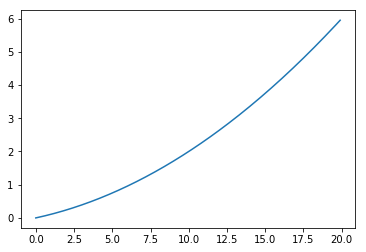

In [23]:
x = np.arange(0. ,20., .1)
y = function_1(x)
plt.plot(x,y)

In [24]:
numerical_diff(function_1, 5)

0.1999999999990898

In [25]:
numerical_diff(function_1, 10)

0.2999999999986347

### Plot

In [26]:
def tangent_line(f, x):
        ''' 多分、接線を返してくれる
        
        Parameters
        ----------
        f: function
                function to calculate tangent
        x: num
                at which x
        
        Returns
        -------
        lambda t , function which takes t, return d*t + f(x) - d*x
        '''
        d = numerical_diff(f, x)
        logger.info(f"differntial is {d}")
        y = f(x) - d*x
        return lambda t: d*t + y

In [27]:
tf = tangent_line(function_1, 5)

2018-11-03 16:28:37,133 - root - INFO - differntial is 0.1999999999990898


In [28]:
y2 = tf(x)

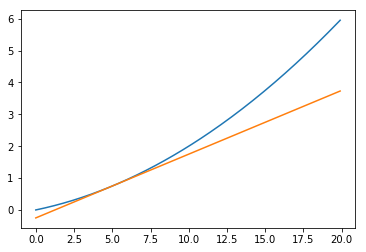

In [29]:
plt.plot(x, y)
plt.plot(x, y2)

2018-11-03 16:28:38,532 - root - INFO - differntial is 0.1


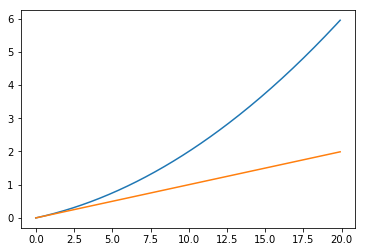

In [30]:
tf = tangent_line(function_1, 0)
y2 = tf(x)
plt.plot(x, y)
plt.plot(x, y2)

## 偏微分

In [31]:
def function_2(x):
        return x[0]**2 + x[1]**2

In [32]:
def numerical_gradient(f, x, debug=False):
        ''' Calcuate gradient for f
        '''
        h = 1e-4
        grad = np.zeros_like(x)
        
        for idx in range(len(x)):
                if debug and idx > 10:
                        break
                logger.debug(f"idx is {idx}")
                tmp_val = x[idx]
                logger.debug(f"tmp_val for x[idx] is {tmp_val}")
                # calculate f(x+h)
                x[idx] = tmp_val + h
                logger.debug(f"new x[idx] is {x[idx]}")
                fxh1 = f(x)
                logger.debug(f"f(x) is {fxh1}")
                
                # f(x-h)
                x[idx] = tmp_val - h
                logger.debug(f"new x[idx] is {x[idx]}")
                fxh2 = f(x)
                logger.debug(f"f(x) is {fxh2}")
                
                grad[idx] = (fxh1 - fxh2)/(2*h)
                logger.debug(f"grad[idx] is {grad[idx]}")
                x[idx] = tmp_val
        return grad

In [33]:
numerical_gradient(function_2, np.array([3.,4.]))

array([6., 8.])

In [34]:
numerical_gradient(function_2, np.array([0.,2.]))

array([0., 4.])

In [35]:
numerical_gradient(function_2, np.array([3.,0.]))

array([6., 0.])

In [36]:
x0 = np.arange(-2, 2.5, .25)
x1 = np.arange(-2, 2.5, .25)
X, Y = np.meshgrid(x0, x1)

In [37]:
X.shape

(18, 18)

In [38]:
x0 = np.arange(-2, 2.5, .25)
x1 = np.arange(-2, 2.5, .25)
X, Y = np.meshgrid(x0, x1)
X = X.flatten()
Y = Y.flatten()

In [66]:
def function_2(x):
        # if 1d
        if x.ndim == 1:
                return np.sum(x**2)
        # if 2d
        return np.sum(x**2, axis=1)
        

In [67]:
X.shape

(324,)

In [68]:
def _numerical_gradient_no_batch(f, x, debug=False):
        ''' Calcuate gradient at point x for f
        '''
        h = 1e-4
        grad = np.zeros_like(x)
        
        for idx in range(x.size):
                if debug and idx > 10:
                        break
                logger.debug(f"idx is {idx}")
                tmp_val = float(x[idx])
                logger.debug(f"tmp_val for x[idx] is {tmp_val}")
                # calculate f(x+h)
                x[idx] = tmp_val + h
                logger.debug(f"new x[idx] is {x[idx]}")
                fxh1 = f(x)
                logger.debug(f"f(x) is {fxh1}")
                
                # f(x-h)
                x[idx] = tmp_val - h
                logger.debug(f"new x[idx] is {x[idx]}")
                fxh2 = f(x)
                logger.debug(f"f(x) is {fxh2}")
                
                grad[idx] = (fxh1 - fxh2)/(2*h)
                logger.debug(f"grad[idx] is {grad[idx]}")
                x[idx] = tmp_val
        return grad

In [69]:
def numerical_gradient(f, X, debug=False):
        ''' Numerical gradient for 2d array
        Parameters
        ----------
        f: function
                function to calculate gradient
        X: 2d array
                grid to calculate gradient
        '''
        # return the original function if 1d
        if X.ndim == 1:
                return _numerical_gradient_no_batch(f, X)
        
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
                logger.debug(f"idx is {idx}, x is {x}")
                grad[idx] = _numerical_gradient_no_batch(f, x)
                
                # debug mode
                if debug and idx > 10:
                        break
        return grad

In [70]:
grad = numerical_gradient(function_2, 
                          np.array([X, Y]),
                          debug=False)

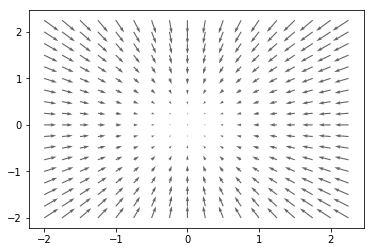

In [71]:
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")

In [108]:
def gradient_descent(f, init_x, lr = 0.01, step_num=100):
        ''' Simple gradient descent
        '''
        x = init_x.copy()
        x_history = []
        
        for i in range(step_num):
                x_history.append(x.copy())
                grad = numerical_gradient(f, x)
                x -= lr * grad
        return x, np.array(x_history)

In [109]:
init_x = np.array([-3., 4.])

In [111]:
gradient_descent(function_2, init_x, lr=.1, step_num=100)[0]

array([-6.11110793e-10,  8.14814391e-10])

In [102]:
gradient_descent(function_2, init_x, lr=10., step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [103]:
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### Plot

In [112]:
lr = 0.1
step_num = 20

In [113]:
x, x_history = gradient_descent(function_2, init_x, 
                                lr=lr, step_num=step_num)

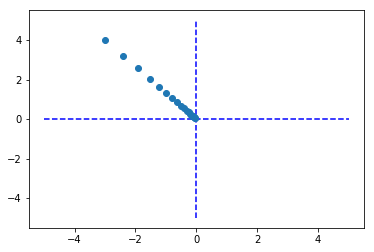

In [118]:
plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:, 1], 'o')

In [136]:
from src.common.functions import softmax, cross_entropy_error, sigmoid
from src.common.gradient import numerical_gradient

In [120]:
class simpleNet:
        ''' Class for simple net
        '''
        def __init__(self):
                self.W = np.random.randn(2,3)
        
        def predict(self, x):
                return np.dot(x, self.W)
        
        def loss(self, x, t):
                z = self.predict(x)
                y = softmax(z)
                loss = cross_entropy_error(y, t)
                
                return loss

In [121]:
net = simpleNet()

In [123]:
net.W

array([[-0.65190811, -0.35074739,  0.91523945],
       [-0.31307736, -1.54178838,  0.05556329]])

In [124]:
x = np.array([.6, .9])

In [126]:
p = net.predict(x)
p

array([-0.67291449, -1.59805798,  0.59915064])

In [127]:
np.argmax(p)

2

In [128]:
t = np.array([0, 0, 1])

In [129]:
net.loss(x, t)

0.3302852503893133

In [130]:
def f(W):
        return net.loss(x, t)

In [131]:
dW = numerical_gradient(f, net.W)

In [132]:
dW

array([[ 0.12085349,  0.04791533, -0.16876882],
       [ 0.18128024,  0.071873  , -0.25315323]])

# Two Layer Net

In [144]:
class TwoLayerNet:
        ''' 
        '''
        def __init__(self, input_size, hidden_size, output_size,
                    weight_init_std=0.01):
                self.params = {}
                self.params['W1'] = weight_init_std * \
                        np.random.randn(input_size,hidden_size)
                self.params['b1'] = np.zeros(hidden_size)
                self.params['W2'] = weight_init_std * \
                        np.random.randn(hidden_size, output_size)
                self.params['b2'] = np.zeros(output_size)
        
        def predict(self, x):
                W1, W2 = self.params['W1'], self.params['W2']
                b1, b2 = self.params['b1'], self.params['b2']
                
                a1 = np.dot(x, W1) + b1
                z1 = sigmoid(a1)
                a2 = np.dot(z1, W2) + b2
                y = softmax(a2)
                
                return y
        
        def loss(self, x, t):
                y = self.predict(x)
                
                return cross_entropy_error(y, t)
        
        def accuracy(self, x, t):
                y = self.predict(x)
                y = np.argmax(y, axis=1)
                t = np.argmax(t, axis=1)
                
                accuracy = np.sum(y == t) / float(x.shape[0])
                return accuracy
        
        def numerical_gradient(self, x, t):
                loss_W = lambda W: self.loss(x, t)
                
                grads = {}
                grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
                grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
                grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
                grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
                
                return grads

In [145]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [146]:
net.params['W1'].shape

(784, 100)

In [147]:
net.params['b1'].shape

(100,)

In [148]:
net.params['W2'].shape

(100, 10)

In [149]:
net.params['b2'].shape

(10,)

In [150]:
x = np.random.rand(100, 784)

In [151]:
y = net.predict(x)

In [156]:
x = np.random.rand(100, 784)

In [157]:
t = np.random.rand(100, 10)

In [158]:
%%time
grads = net.numerical_gradient(x, t)

CPU times: user 2min 43s, sys: 6.21 s, total: 2min 49s
Wall time: 1min 26s


In [160]:
grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

(10,)

In [161]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [162]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

In [170]:
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [171]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [172]:
%%time
for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        grad = network.numerical_gradient(x_batch, t_batch)
        for key in ('W1', 'b1', 'W2', 'b2'):
                network.params[key] -= learning_rate*grad[key]
                
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

CPU times: user 11min 12s, sys: 34 s, total: 11min 46s
Wall time: 6min 11s


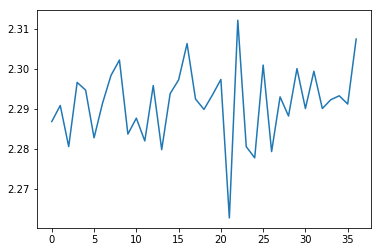

In [173]:
markers = {'train':'o', 'test':'s'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train_loss')

### Better version

In [187]:
iters_num = 100
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [188]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [189]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

In [190]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [191]:
%%time
for i in range(iters_num):
        logger.info(f"iter: {i}")
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        grad = network.numerical_gradient(x_batch, t_batch)
        for key in ('W1', 'b1', 'W2', 'b2'):
                network.params[key] -= learning_rate*grad[key]
                
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)
        
        # accuracy per epoch
        # if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        logger.info(f"Train: {train_acc}, test: {test_acc}")

2018-11-04 11:22:43,789 - root - INFO - iter: 0
2018-11-04 11:23:30,479 - root - INFO - Train: 0.11236666666666667, test: 0.1135
2018-11-04 11:23:30,481 - root - INFO - iter: 1
2018-11-04 11:24:12,560 - root - INFO - Train: 0.11236666666666667, test: 0.1135
2018-11-04 11:24:12,560 - root - INFO - iter: 2
2018-11-04 11:24:53,412 - root - INFO - Train: 0.11236666666666667, test: 0.1135
2018-11-04 11:24:53,413 - root - INFO - iter: 3
2018-11-04 11:25:33,796 - root - INFO - Train: 0.11236666666666667, test: 0.1135
2018-11-04 11:25:33,797 - root - INFO - iter: 4
2018-11-04 11:26:13,222 - root - INFO - Train: 0.11236666666666667, test: 0.1135
2018-11-04 11:26:13,222 - root - INFO - iter: 5
2018-11-04 11:26:52,912 - root - INFO - Train: 0.11236666666666667, test: 0.1135
2018-11-04 11:26:52,913 - root - INFO - iter: 6
2018-11-04 11:27:32,426 - root - INFO - Train: 0.11236666666666667, test: 0.1135
2018-11-04 11:27:32,427 - root - INFO - iter: 7
2018-11-04 11:28:11,626 - root - INFO - Train: 0.

KeyboardInterrupt: 

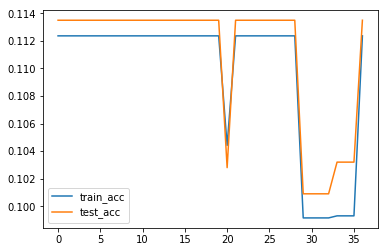

In [192]:
markers = {'train':'o', 'test':'s'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label = 'train_acc')
plt.plot(x, test_acc_list, label = 'test_acc')
plt.legend()